# Сжатие картинок с помощью SVD разложения
В этом задании нужно сделать сжатие изображения, сжатие с потерями. Для этого мы используем SVD разложение.

Примерный порядок действий:
1) Найти любую картинку,
2) Прочитать её с помощью библиотеки PIL
3) Преобразовать в numpy массив
4) Применить SVD к матрице - обязательно прочитайте справку по этой функции `np.linalg.svd`

**Примечание**: Цветная картинка представляет собой трёхканальное изображение RBG, поэтому напрямую SVD разложение применить не получится. Либо вы преобразуете изображение в одноканальное (градации серого), усредняя все три канала. Либо делаете SVD для всех трёх каналов в отдельности.

5) Далее оставляете небольшое количество сингулярных значений - 1, 2, 10, 30, 100. И выводите результат в виде получившейся картинки - чем больше сингулярных чисел, тем ближе приближённая матрица к исходной.

6) Сравните количество байт, необходимых для хранения исходной картинки и сжатой версии.

Ниже представлены основные функции и библиотеки, которые вам понадобятся.

Задание оформляете в виде блокнота jupyter. Особо понравившиеся картинки можно сохранить отдельно на диск, но мне удобнее чтобы они присутствовали в самом jupyter блокноте.

In [47]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [27]:
!pip install Pillow
!pip install --user Pillow

In [51]:
img = Image.open('Power.jpeg')

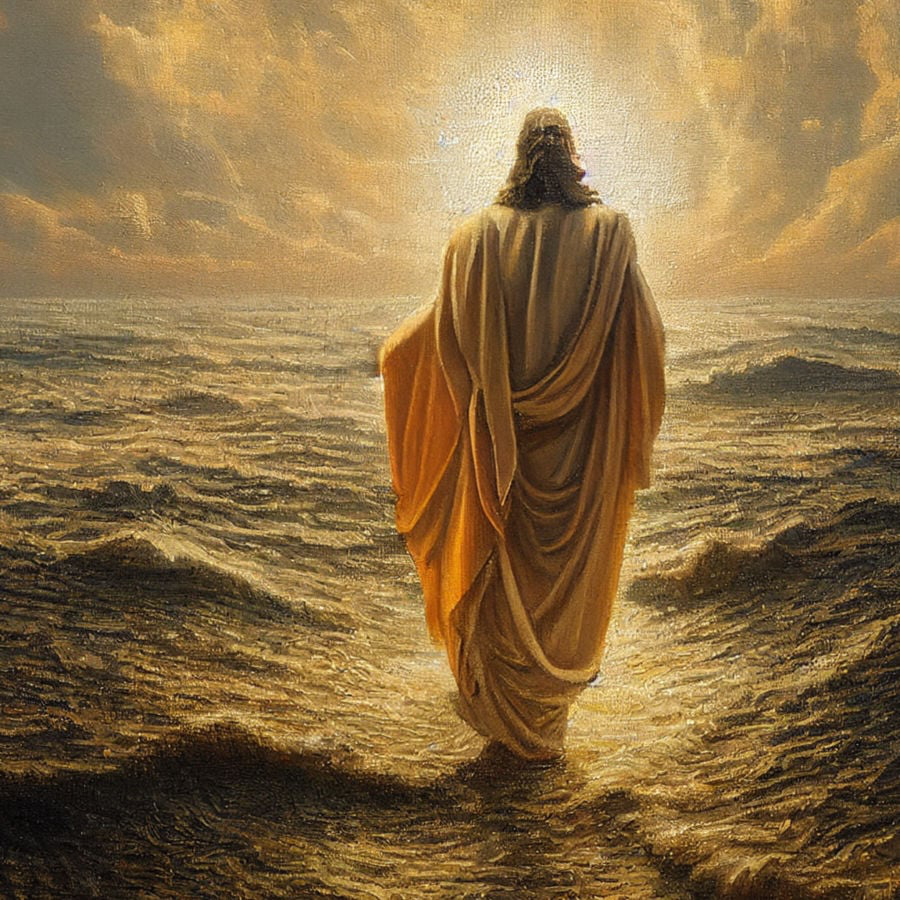

In [53]:
img

In [55]:
x = np.array(img, dtype=np.float32)
x.dtype

dtype('float32')

In [57]:
x.shape

(900, 900, 3)

In [59]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

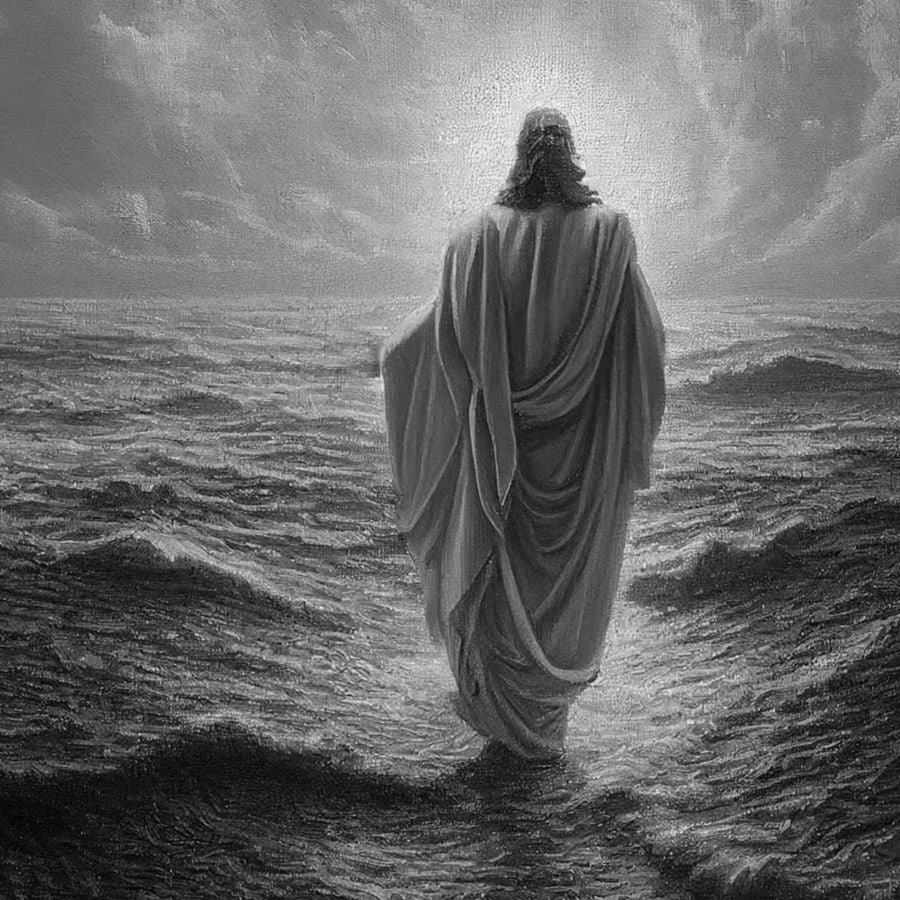

In [61]:
y = Image.fromarray(np.asarray(x.mean(axis=2), dtype=np.uint8))
y

In [83]:
y = x.mean(axis=2)
y

array([[102.333336, 101.      , 101.      , ..., 132.33333 , 129.33333 ,
        123.333336],
       [100.333336,  99.      ,  99.      , ..., 133.33333 , 128.33333 ,
        120.333336],
       [103.333336, 101.333336, 102.      , ..., 137.33333 , 131.33333 ,
        122.333336],
       ...,
       [ 48.      ,  47.333332,  45.666668, ...,  17.      ,  20.      ,
         23.      ],
       [ 52.      ,  41.333332,  36.666668, ...,  29.      ,  29.      ,
         29.      ],
       [ 50.      ,  29.333334,  22.666666, ...,  31.      ,  29.      ,
         27.      ]], dtype=float32)

In [63]:
U, S, V = np.linalg.svd(y, full_matrices=False)

In [65]:
U.shape

(900, 900)

In [81]:
V.shape

(900, 900)

In [67]:
B = U.dot (np.diag (S).dot(V))

In [69]:
B.shape

(900, 900)

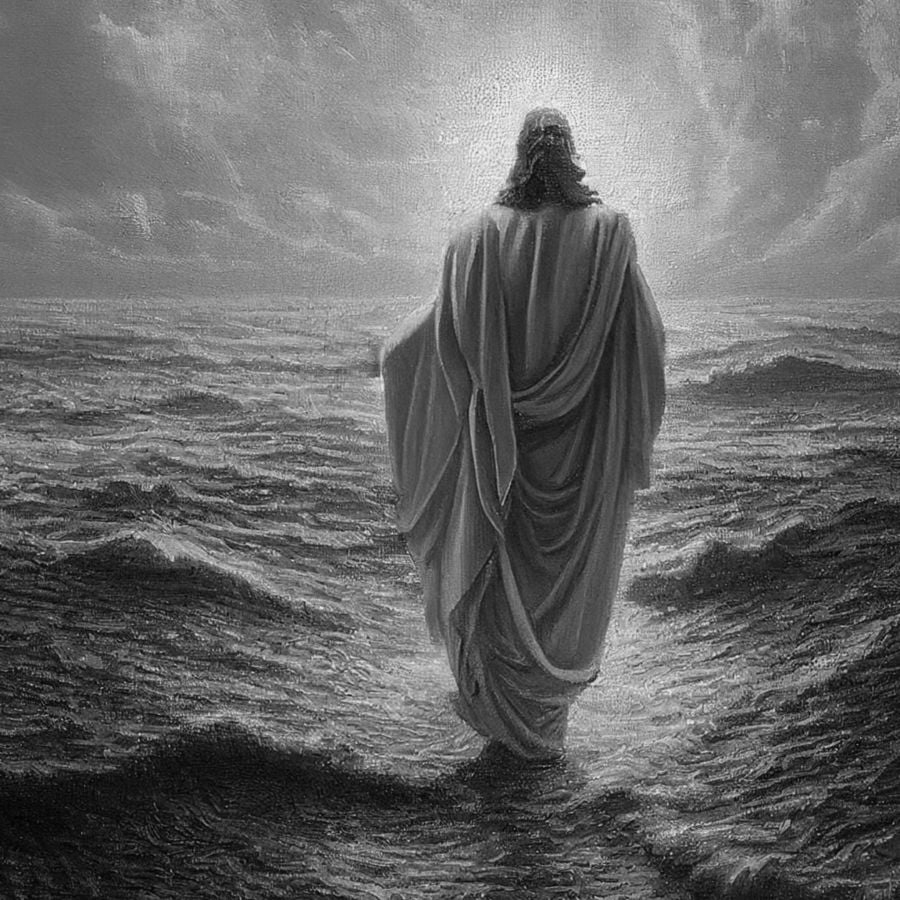

In [71]:
C = Image.fromarray(np.asarray(B, dtype=np.uint8))
C

In [73]:
B.shape

(900, 900)

In [75]:
S = np.diag(S)

In [77]:
r = [10, 20, 30, 40, 60, 80]
for i in r:
    new_y = U[:,:i] @ S[:i,:i] @ V[:i,:]
    new_y[new_y < 0] = 0
    new_y[new_y > 255] = 255
    Image.fromarray(np.asarray(new_y, dtype=np.uint8)).save(f'result_{i}.png')

(-0.5, 899.5, 899.5, -0.5)

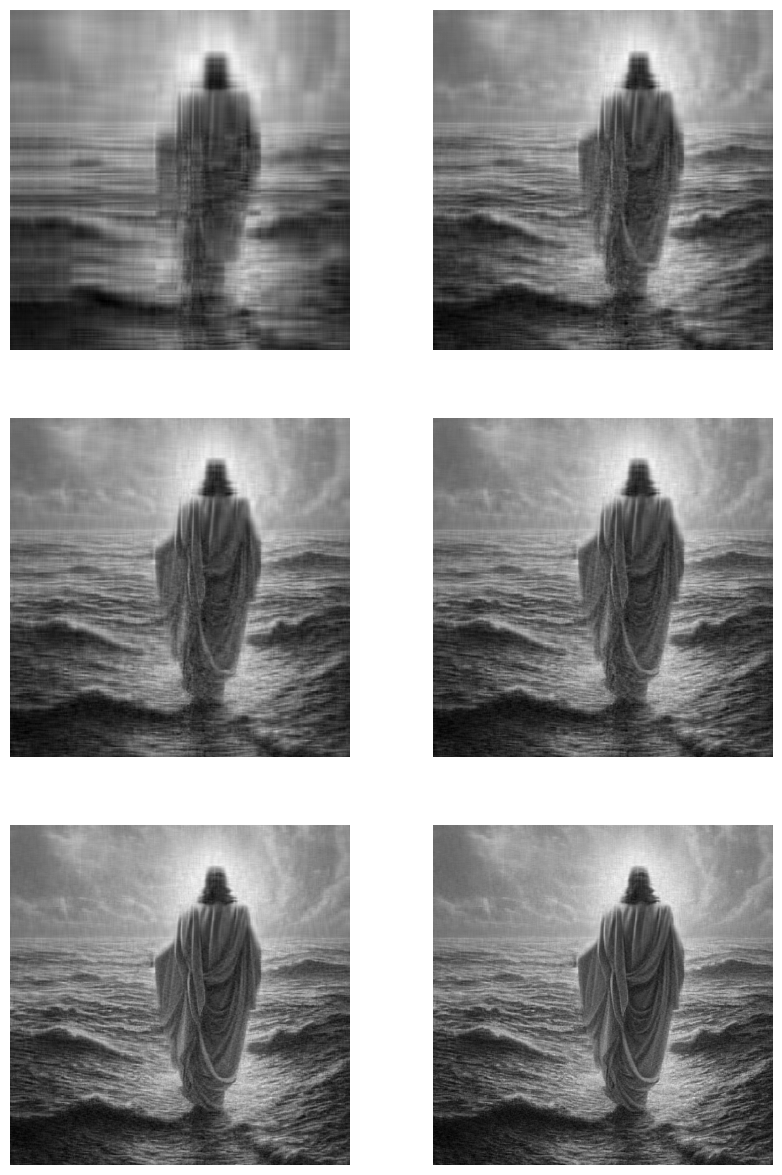

In [79]:
fig = plt.figure(figsize=(10, 15))

rows = 3
columns = 2

Image1 = Image.open('/Users/georgesgedeon/work/SKAIPMV2024/homework-practice-03-svd/result_10.png')
Image2 = Image.open('/Users/georgesgedeon/work/SKAIPMV2024/homework-practice-03-svd/result_20.png')
Image3 = Image.open('/Users/georgesgedeon/work/SKAIPMV2024/homework-practice-03-svd/result_30.png')
Image4 = Image.open('/Users/georgesgedeon/work/SKAIPMV2024/homework-practice-03-svd/result_40.png')
Image5 = Image.open('/Users/georgesgedeon/work/SKAIPMV2024/homework-practice-03-svd/result_60.png')
Image6 = Image.open('/Users/georgesgedeon/work/SKAIPMV2024/homework-practice-03-svd/result_80.png')

fig.add_subplot(rows, columns, 1)

plt.imshow(Image1, cmap='gray')
plt.axis('off')

fig.add_subplot(rows, columns, 2)
  
plt.imshow(Image2, cmap='gray')
plt.axis('off')
  
fig.add_subplot(rows, columns, 3)
  
plt.imshow(Image3, cmap='gray')
plt.axis('off')
  
fig.add_subplot(rows, columns, 4)
  
plt.imshow(Image4, cmap='gray')
plt.axis('off')

fig.add_subplot(rows, columns, 5)
  
plt.imshow(Image5, cmap='gray')
plt.axis('off')

fig.add_subplot(rows, columns, 6)
  
plt.imshow(Image6, cmap='gray')
plt.axis('off')